# Introduction to "Second Exploration"

This notebook, titled **"Second Exploration"**, is part of an ongoing data analysis project aimed at uncovering deeper insights and relationships within the dataset. The focus of this exploration is to perform a comprehensive analysis and prepare the data for subsequent modeling tasks.

## Objectives

The primary objectives of this notebook include:

1. **Exploratory Data Analysis (EDA)**:
   - Understand the distribution and characteristics of the data.
   - Identify patterns, trends, and potential anomalies.

2. **Feature Engineering**:
   - Create new variables to enhance the dataset's predictive power.
   - Derive meaningful insights from the existing features.

3. **Bivariate and Multivariate Analysis**:
   - Explore relationships between pairs of variables.
   - Perform multivariate analysis to examine interactions among multiple features.

4. **Analysis of Variance (ANOVA) and Correlation**:
   - Evaluate the variance within groups of data to identify significant differences.
   - Study correlations between numerical variables to uncover linear relationships.

## Expected Outcomes

By the end of this notebook, the dataset will be thoroughly analyzed and enriched, providing a robust foundation for future modeling efforts. The insights gained during this exploration will guide decision-making and help refine the approach to clustering and other analytical tasks in subsequent phases.

---

Let’s dive into the exploration!


In [15]:
import sys
import importlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import itertools

sys.path.append('../medical_insurance_project/utils')
import data_explorer as de

## Data load and first visualization

In [16]:
path = '../medical_insurance_project/data/cleaned.csv'
df = pd.read_csv(path)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [17]:
# Selecting discrete variables:
discrete_features = df.select_dtypes(include='object').columns

# Selecting continous variables:
c_features = df.select_dtypes(include=np.number).columns

## Bivariate analysis

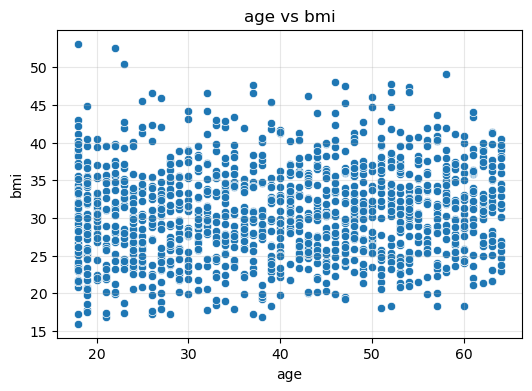

0.10934361041896887


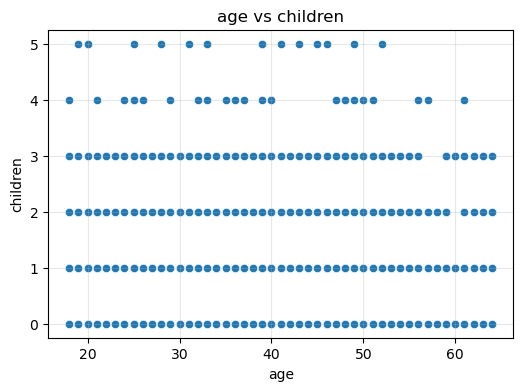

0.041536210016366204


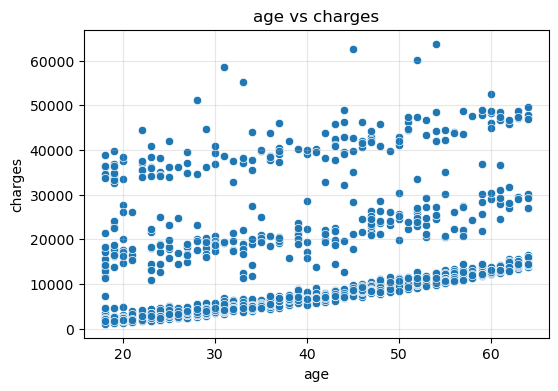

0.2983082125097864


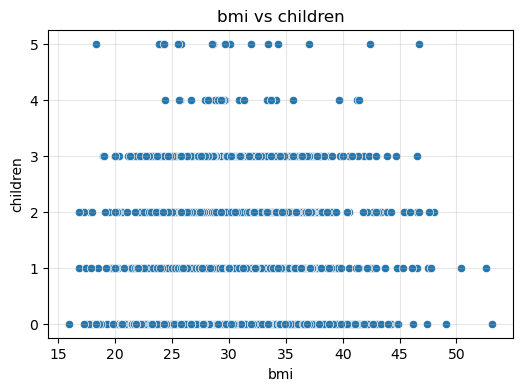

0.012754657513395214


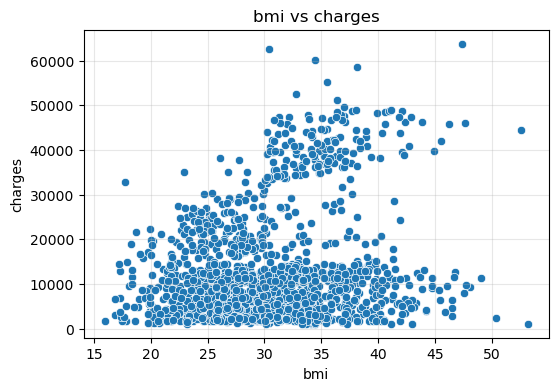

0.19840083122624938


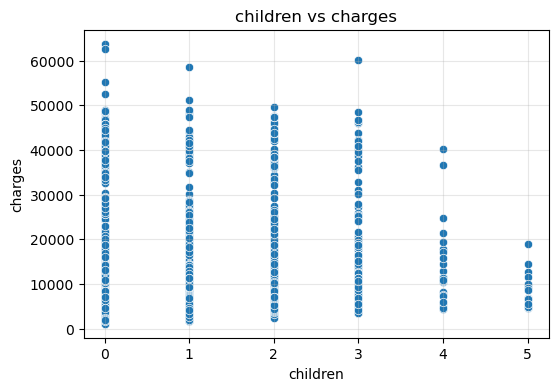

0.06738935083963243


In [18]:
# Creating all pair combinations
combinations = list(itertools.combinations(c_features, 2))

# Creating individual charts
for x, y in combinations:
    plt.figure(figsize=(6, 4)) 
    sns.scatterplot(data=df, x=x, y=y)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'{x} vs {y}')
    plt.grid(True, alpha=0.3)
    plt.show()
    print(df[x].corr(df[y]))

- The Pearson correlation coefficient suggests a weak relationship between the variables. However, the scatterplots for 'age vs. charges' and 'bmi vs. charges' reveal some patterns in the data. Therefore, it is necessary to conduct a deeper analysis to explore this further.

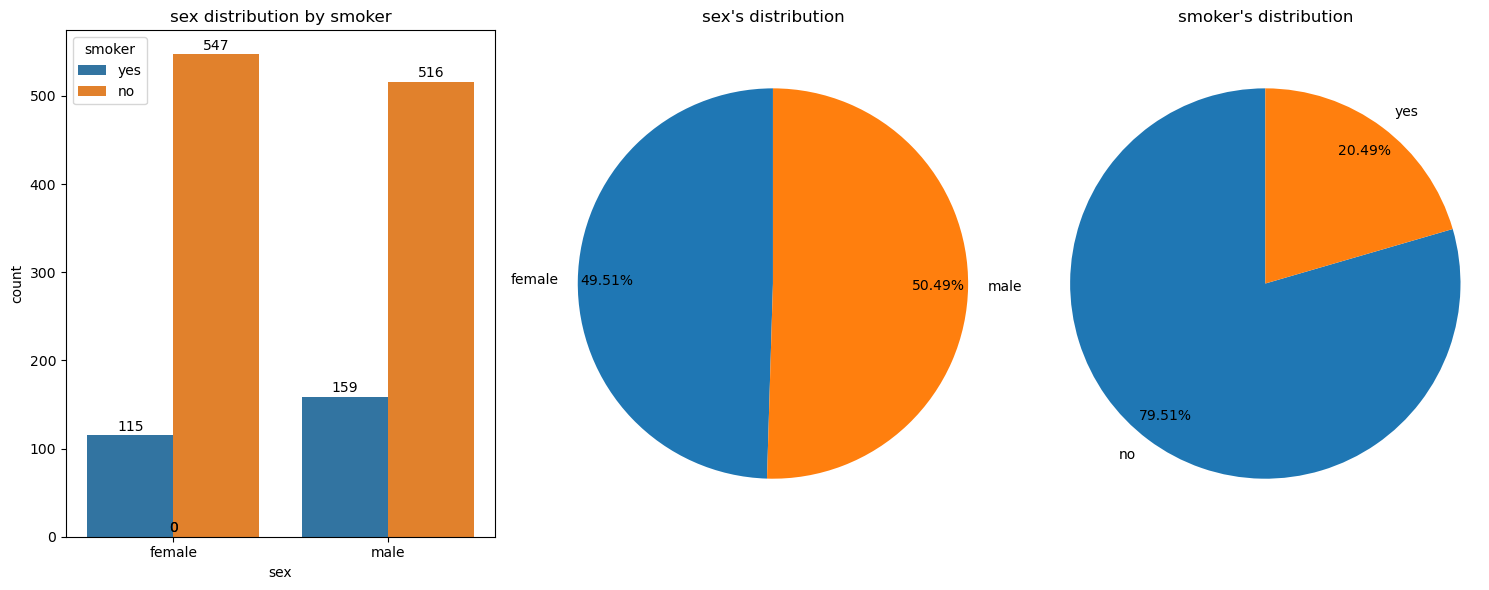

      sex  Total smoker  Count      %
0  female    662     no    547  82.63
1    male    675     no    516  76.44
2    male    675    yes    159  23.56
3  female    662    yes    115  17.37


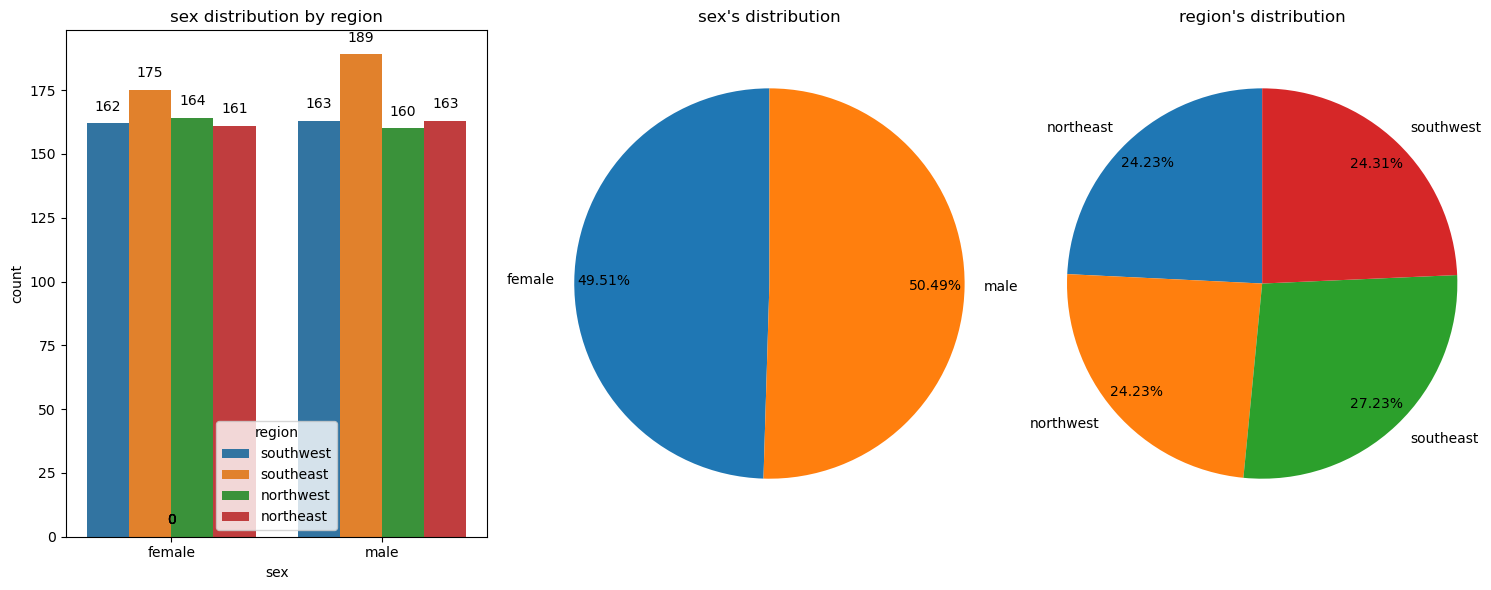

      sex  Total     region  Count      %
0    male    675  southeast    189  28.00
1  female    662  southeast    175  26.44
2  female    662  northwest    164  24.77
3    male    675  northeast    163  24.15
4    male    675  southwest    163  24.15
5  female    662  southwest    162  24.47
6  female    662  northeast    161  24.32
7    male    675  northwest    160  23.70


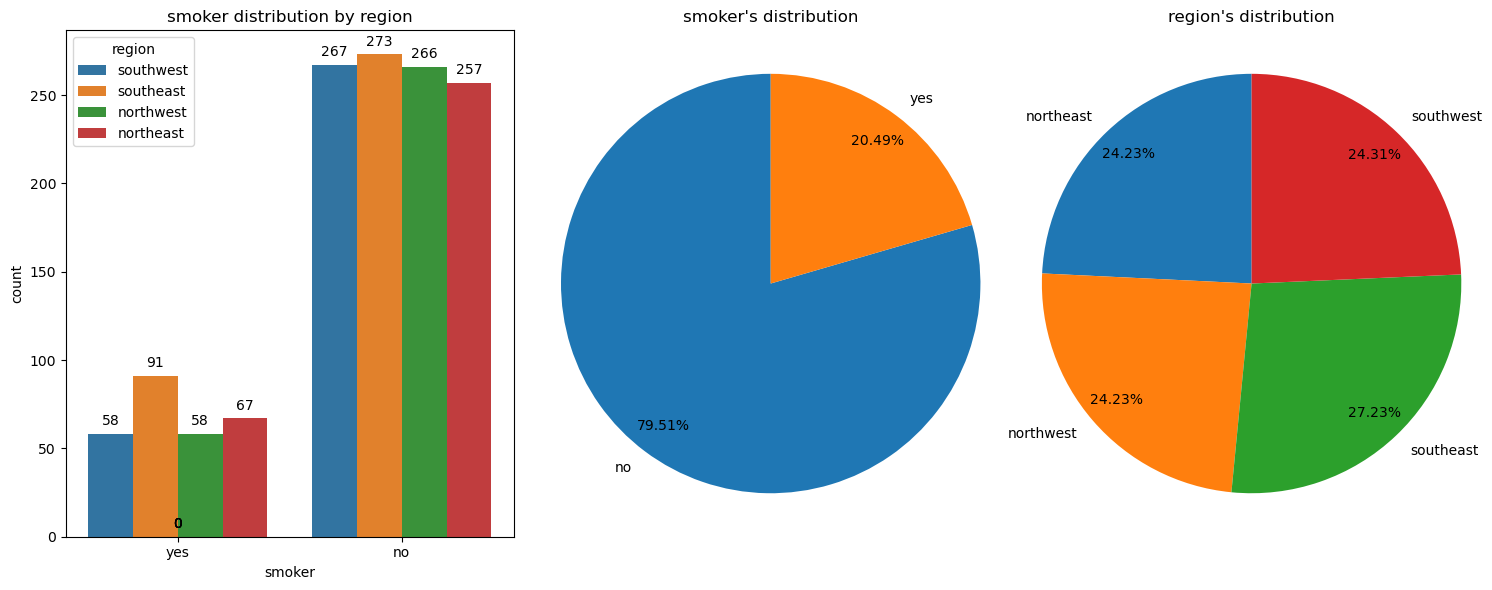

  smoker  Total     region  Count      %
0     no   1063  southeast    273  25.68
1     no   1063  southwest    267  25.12
2     no   1063  northwest    266  25.02
3     no   1063  northeast    257  24.18
4    yes    274  southeast     91  33.21
5    yes    274  northeast     67  24.45
6    yes    274  northwest     58  21.17
7    yes    274  southwest     58  21.17


In [19]:
# Creating all pair combinations
discrete_convinations = list(itertools.combinations(discrete_features, 2))

# Creating individual charts
for x,y in discrete_convinations:
    plt.figure(figsize=(15,6))
    plt.subplot(1,3,1)
    de.countplot_hue(df, x, hue=y)
    plt.tight_layout()
    plt.subplot(1,3,2)
    de.dist_pieplot(df,x)
    plt.subplot(1,3,3)
    de.dist_pieplot(df,y)
    plt.tight_layout()
    plt.show()
    print(de.percentage_table(df,x,hue=y))


- There aren't any significant findings, except that males have slightly more smokers than females, and the number of smokers represents 20% of the total sample.

## Multivariate Analysis

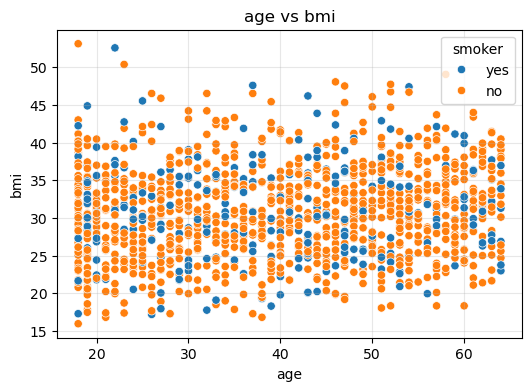

0.10934361041896887


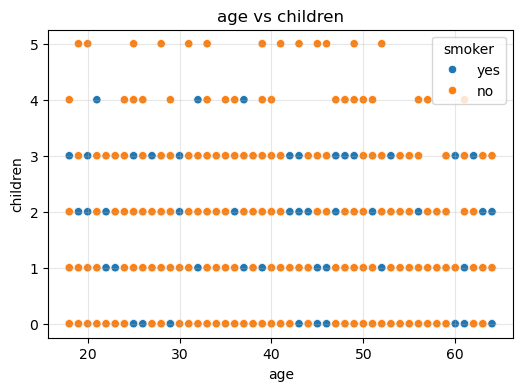

0.041536210016366204


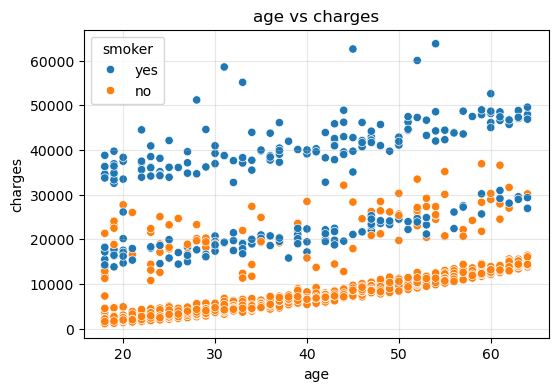

0.2983082125097864


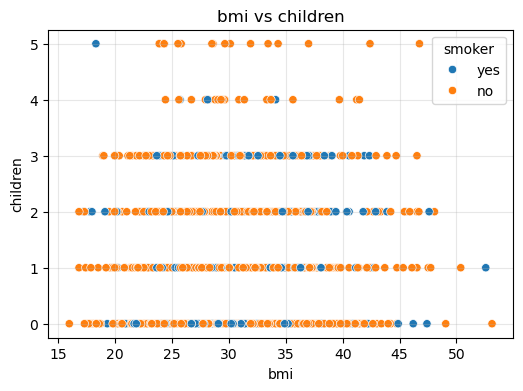

0.012754657513395214


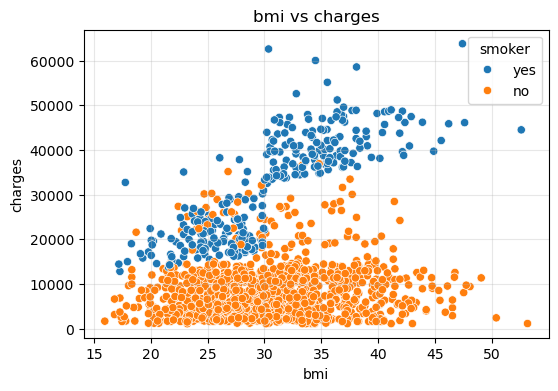

0.19840083122624938


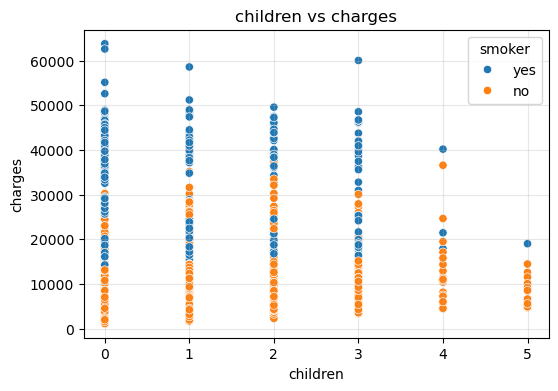

0.06738935083963243


In [20]:
# Creating all pair combinations
combinations = list(itertools.combinations(c_features, 2))

# Creating individual charts
for x, y in combinations:
    plt.figure(figsize=(6, 4)) 
    sns.scatterplot(
        data=df,
        x=x,
        y=y,
        hue='smoker'
    )
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'{x} vs {y}')
    plt.grid(True, alpha=0.3)
    plt.show()
    print(df[x].corr(df[y]))

- There its clear division between smokers and non-smokers.

## Age vs Charges vs Smoker

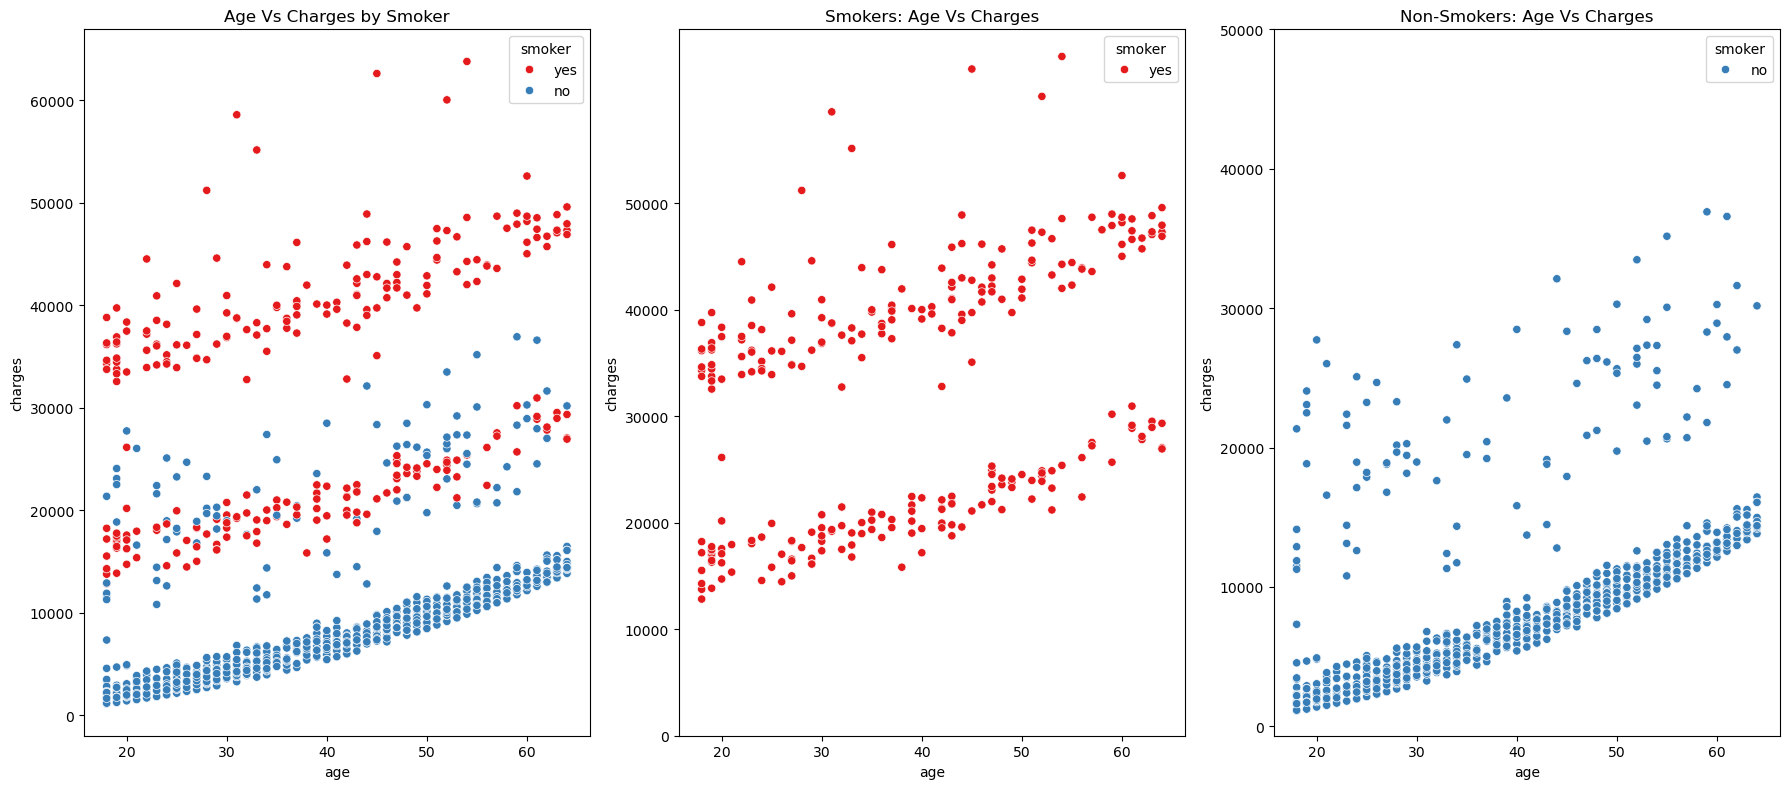

Correlation between Age & Charges is:0.2983082125097864
Correlation between Age & Charges for smokers is:0.36822444373077773
Correlation between Age & Charges for non-smokers is:0.6274002231304533


In [21]:
plt.figure(figsize=(18,8))

# Subplot 1: Age vs Charges by smoker
plt.subplot(1, 3, 1)
sns.scatterplot(
    data=df,
    x='age',  # X-axis: age
    y='charges',  # Y-axis: charges
    hue='smoker',  # Color points by smoker status
    palette='Set1'  # Use a predefined color palette
)
plt.tight_layout()  # Adjust layout to avoid overlap
plt.title('Age Vs Charges by Smoker')

# Get the colors used in the first plot
palette = sns.color_palette('Set1', n_colors=2)  # Extract two colors from the palette (one for 'yes' and one for 'no')

# Subplot 2: Smokers only
plt.subplot(1, 3, 2)
sns.scatterplot(
    data=df[df['smoker'] == 'yes'],  # Filter data to include only smokers
    x='age',  # X-axis: age
    y='charges',  # Y-axis: charges
    hue='smoker',  # Color points by smoker status
    palette={ 'yes': palette[0] }  # Apply the same color used for 'yes' in the first plot
)
plt.yticks(range(0, 60000, 10000))
plt.tight_layout()  # Adjust layout to avoid overlap
plt.title('Smokers: Age Vs Charges')

# Subplot 3: Non-smokers only
plt.subplot(1, 3, 3)
sns.scatterplot(
    data=df[df['smoker'] == 'no'],  # Filter data to include only non-smokers
    x='age',  # X-axis: age
    y='charges',  # Y-axis: charges
    hue='smoker',  # Color points by smoker status
    palette={ 'no': palette[1] }  # Apply the same color used for 'no' in the first plot
)
plt.yticks(range(0, 60000, 10000))
plt.tight_layout()  # Adjust layout to avoid overlap
plt.title('Non-Smokers: Age Vs Charges')

plt.show()  # Display all the plots
print(f"Correlation between Age & Charges is:{df['age'].corr(df['charges'])}")
print(f"Correlation between Age & Charges for smokers is:{df[df['smoker'] == 'yes']['age'].corr(df[df['smoker'] == 'yes']['charges'])}")
print(f"Correlation between Age & Charges for non-smokers is:{df[df['smoker'] == 'no']['age'].corr(df[df['smoker'] == 'no']['charges'])}")

## Bmi vs Charges vs Smoker

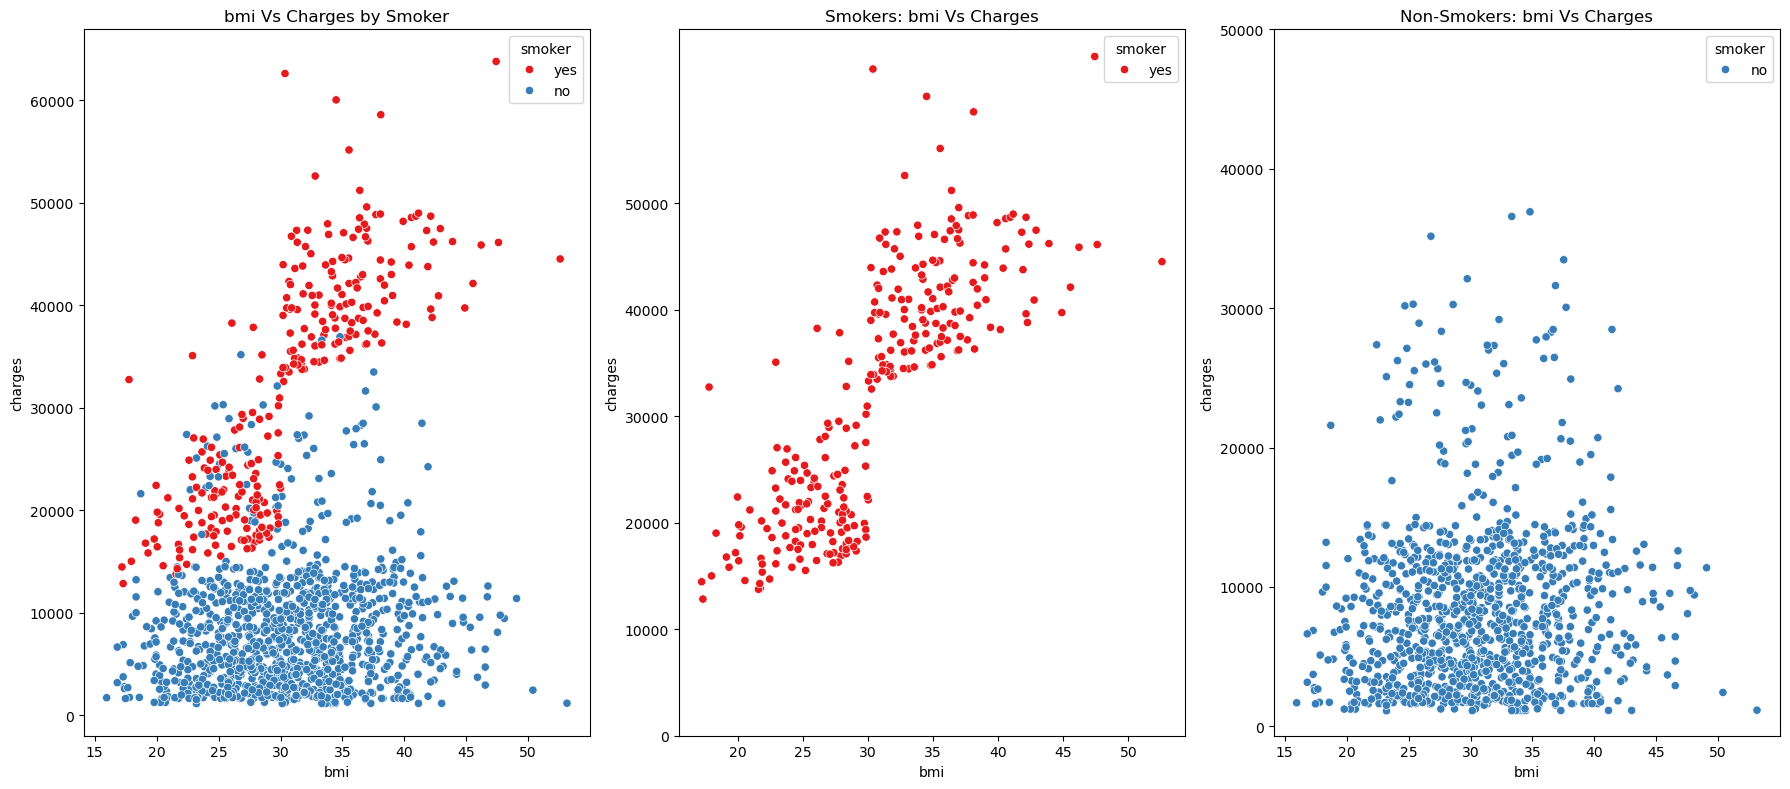

Correlation between Bmi & Charges is:0.19840083122624938
Correlation between Bmi & Charges for smokers is:0.8064806070155405
Correlation between Bmi & Charges for non-smokers is:0.08407651699889863


In [22]:
plt.figure(figsize=(18,8))

# Subplot 1: bmi vs Charges by smoker
plt.subplot(1, 3, 1)
sns.scatterplot(
    data=df,
    x='bmi',  # X-axis: bmi
    y='charges',  # Y-axis: charges
    hue='smoker',  # Color points by smoker status
    palette='Set1'  # Use a predefined color palette
)
plt.tight_layout()  # Adjust layout to avoid bmi
plt.title('bmi Vs Charges by Smoker')

# Get the colors used in the first plot
palette = sns.color_palette('Set1', n_colors=2)  # Extract two colors from the palette (one for 'yes' and one for 'no')

# Subplot 2: Smokers only
plt.subplot(1, 3, 2)
sns.scatterplot(
    data=df[df['smoker'] == 'yes'],  # Filter data to include only smokers
    x='bmi',  # X-axis: bmi
    y='charges',  # Y-axis: charges
    hue='smoker',  # Color points by smoker status
    palette={ 'yes': palette[0] }  # Apply the same color used for 'yes' in the first plot
)
plt.yticks(range(0, 60000, 10000))
plt.tight_layout()  # Adjust layout to avoid bmi
plt.title('Smokers: bmi Vs Charges')

# Subplot 3: Non-smokers only
plt.subplot(1, 3, 3)
sns.scatterplot(
    data=df[df['smoker'] == 'no'],  # Filter data to include only non-smokers
    x='bmi',  # X-axis: bmi
    y='charges',  # Y-axis: charges
    hue='smoker',  # Color points by smoker status
    palette={ 'no': palette[1] }  # Apply the same color used for 'no' in the first plot
)
plt.yticks(range(0, 60000, 10000))
plt.tight_layout()  # Adjust layout to avoid bmi
plt.title('Non-Smokers: bmi Vs Charges')

plt.show()  # Display all the plots
print(f"Correlation between Bmi & Charges is:{df['bmi'].corr(df['charges'])}")
print(f"Correlation between Bmi & Charges for smokers is:{df[df['smoker'] == 'yes']['bmi'].corr(df[df['smoker'] == 'yes']['charges'])}")
print(f"Correlation between Bmi & Charges for non-smokers is:{df[df['smoker'] == 'no']['bmi'].corr(df[df['smoker'] == 'no']['charges'])}")

- It's clear that there are different patterns between smokers and non-smokers.
- Smoker individuals present a strong correlation between BMI and Charges (0.8), while non-smokers show a very weak correlation (0.08).
- It is necessary to conduct further research.

## Analyzing Smokers Individuals

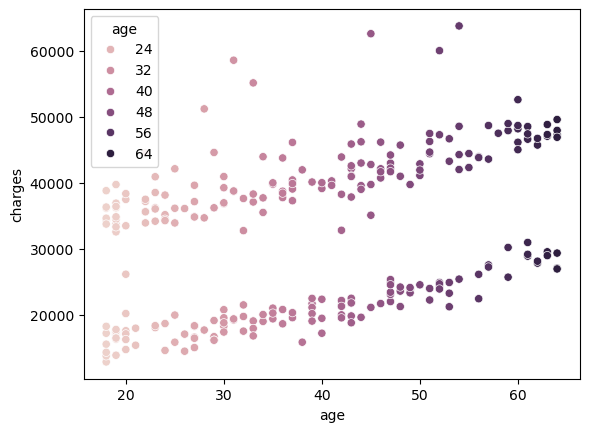

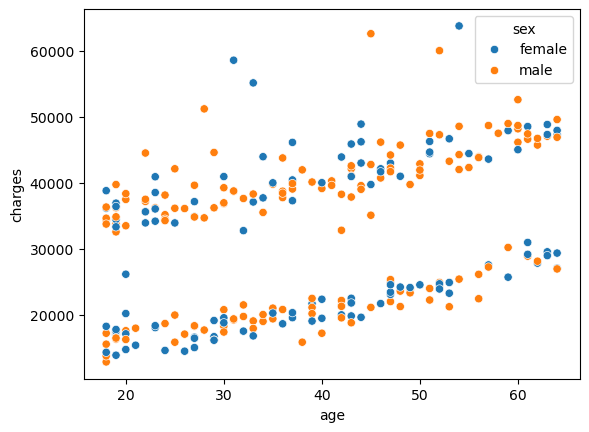

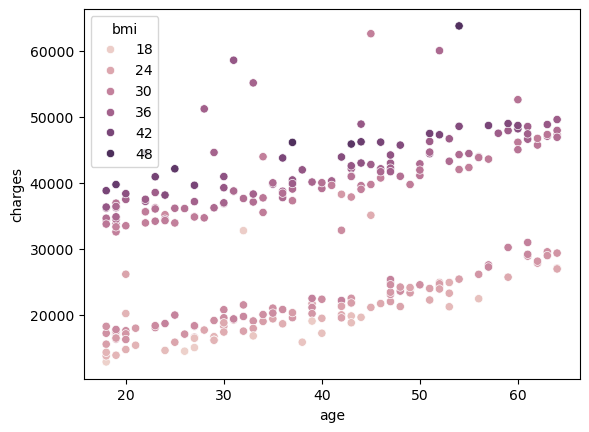

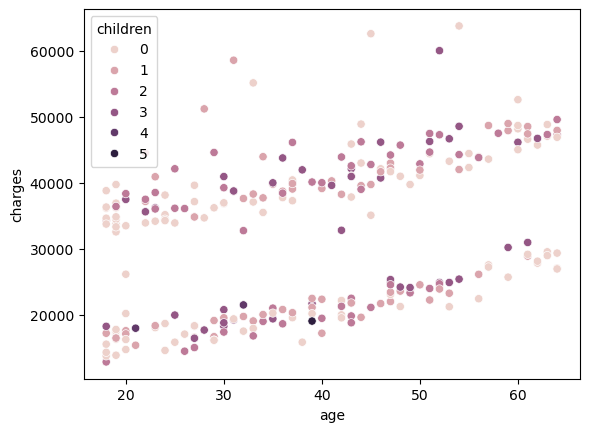

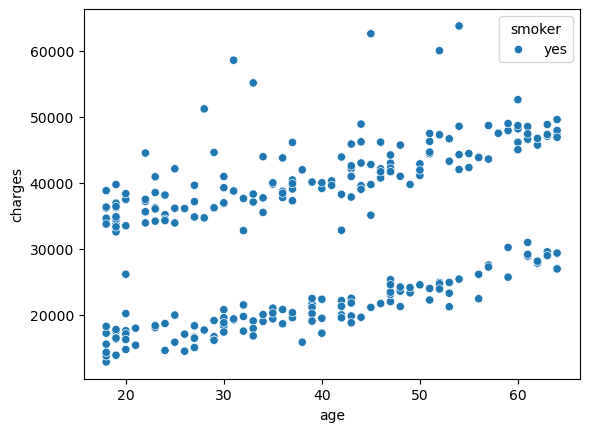

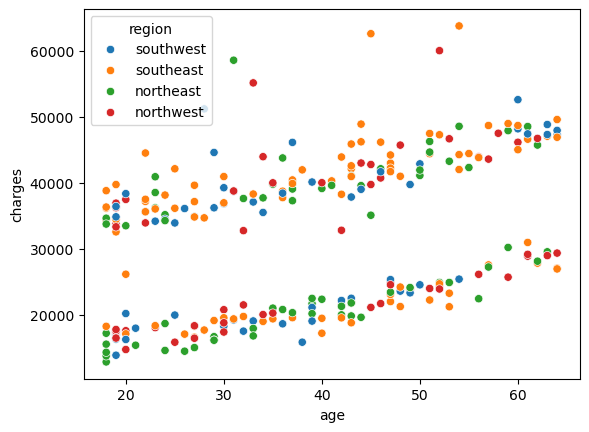

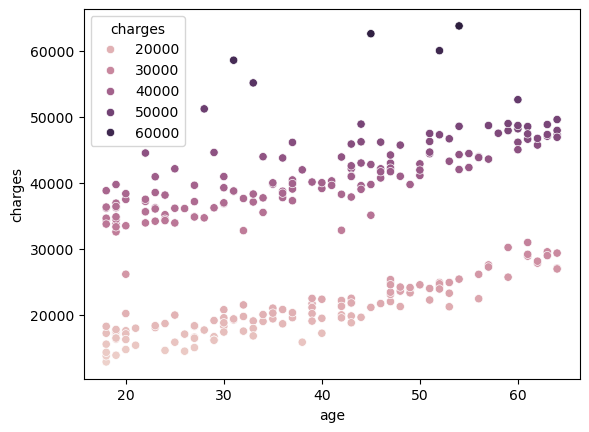

In [23]:
# Creating smokers dataset
filter_ = df['smoker'] == 'yes'

smokers_df = df[filter_].copy()

for col in df.columns:
    sns.scatterplot(
        data=smokers_df,
        x='age',
        y='charges',
        hue=col
    )
    plt.show()

- The charges vs age by bmi scatterplot shows that the records with the higher charges belowns to individuals with a high bmi.

### Creating the "bmi_category" column

In [24]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal weight'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obesity'

# Create the new categorical column 'bmi_category' based on the 'bmi' values
df['bmi_category'] = df['bmi'].apply(categorize_bmi)

# Check the results
df.head()

smokers_df = df[filter_].copy()


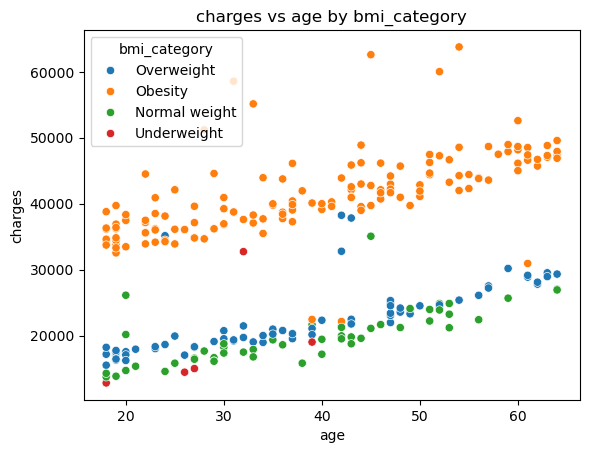

In [25]:
sns.scatterplot(
    data=smokers_df,
    x='age',
    y='charges',
    hue='bmi_category'
)
plt.title('charges vs age by bmi_category')
plt.show()

- This scatterplot clearly confirms that the group with the highest charges contains those smokers individuals with obesity.

## Analysing non-smokers individuals

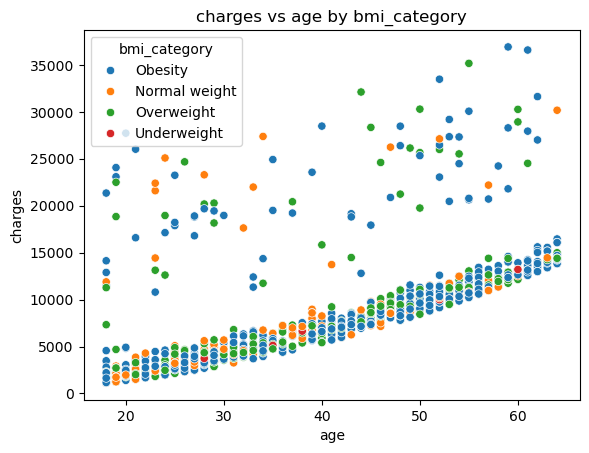

In [26]:
filter_ = df['smoker'] == 'no'

non_smokers = df[filter_].copy()

sns.scatterplot(
data=non_smokers,
x='age',
y='charges',
hue='bmi_category'
)
plt.title('charges vs age by bmi_category')
plt.show()

- This scatterplot clearly shows that non-smokers don't have the same pattern, which can mean that high BMI values do not affect smokers and non-smokers in the same way.

In [27]:
df.groupby('children')['charges'].mean()

children
0    12384.695344
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64

# Consideration of Separate Models for Smokers and Non-Smokers

Based on the exploratory data analysis (EDA), a significant difference in patterns has been observed between smokers and non-smokers. This suggests that it might be beneficial to test the performance of separate predictive models for each class (smokers and non-smokers) to better capture the distinct relationships between features and the target variable.

However, it is important to consider the size of the dataset. Since the dataset is very small, splitting it into two subsets—one for smokers and one for non-smokers—would result in insufficient data for each model. This could lead to problems such as:

- Poor generalization due to limited data for training.
- Overfitting, as the models might capture noise instead of true patterns.
- Difficulty in evaluating the models' performance due to a lack of representative test samples.

Given these constraints, while it is conceptually promising to test separate models, the practical limitations of the dataset size suggest that a single unified model might be more feasible at this stage. This unified model can include the `smoker` variable as a feature to account for the differences in patterns, ensuring that the model captures the variation without needing separate datasets.

Future efforts could revisit the idea of separate models if a larger dataset becomes available.


## Correlation Analysis

<Axes: >

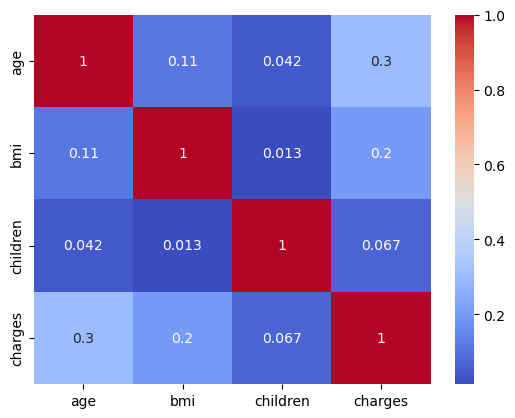

In [28]:
sns.heatmap(
    data=df.select_dtypes(include=np.number).corr(),
    annot=True,
    cmap='coolwarm'
)

- The highest correlations are between charges and age (0.3) and between bmi and charges (0.2), respectively.

## Conclusions

In the notebook **"second_exploration.ipynb"**, a comprehensive Exploratory Data Analysis (EDA) was conducted to identify the key patterns influencing our target variable, **"charges"**. 

### Key Findings:
1. **BMI (Body Mass Index)**: 
   - A strong correlation was observed between BMI and charges (among smoking individuals). Individuals with higher BMI values tend to have increased charges, suggesting a significant influence of BMI on healthcare costs.

2. **Age**: 
   - Age plays a pivotal role, with older individuals generally incurring higher charges. This is likely due to age-related health risks and conditions that require more medical attention.

3. **Smokers**: 
   - Smoking status emerged as a critical factor, with smokers showing substantially higher charges compared to non-smokers. This aligns with the known health risks associated with smoking.

These variables—**BMI**, **age**, and **smoking status**—stand out as the most impactful features affecting the target variable, **charges**. These insights will guide further preprocessing and model development to ensure accurate predictions and meaningful interpretations.
